# Grade: /100

## Instructions

- Once the notebook is complete, restart your kernel and rerun your cells

- Submit this notebook to owl by the deadline

- You may use any python library functions you wish to complete the Lab assignment.

This notebook contains the questions for Assignment 1. Please note, a random seed has been set to ensure the reproducability of the results -- _DO NOT_ change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed as well**. Make sure to complete this assignment individually and appropriately reference all external code and documentation used.


## Data

In this Assignmnet you will use 2 separate datasets. Datasets are entitled according to the exam Questions (Dataset1 to be used in Question1, and Dataset2 to be used in Question2).

You need to download datasets from OWL in the `Assignments / Assignment1`.


### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.


In [20]:
## perform the necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

import copy
%matplotlib inline

## Question 1 - Regression (70 pts)

### Dataset

In this question you need to download and use Dataset1.

Dataset1 lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

- Age: Player age in years
- Nationality: Players nationality
- Overall: Player overall performance score (higher better)
- Potential: Player potential score (higher better)
- Club: Player home soccer club
- Value: Player value _i.e_, the amount of money a club should pay in order to purchase the player (higher better)
- Wage: Player stipend (higher better)
- Preferred Foot: Player preferred foot to play
- International Reputation: Player international fame (higher better)
- Week Foot: Performance score of player weak foot (higher better)
- Skill Moves: Player move skill score (higher better)
- Body Type: Player body type
- Position: Position player holds on the pitch
- Height: Player height in CM
- Weight: Player weight in kg


### Question 1.1 - Data loading (8 pts)

- Load `Dataset1.csv` as a pandas dataframe, and display its first 5 rows.
- Show the statistical summary of the data.
- How many missing values does dataset contain?
- Dummy code catecorical variables (drop the first).


In [2]:
Dataset1 = pd.read_csv("Dataset1.csv")

In [3]:
Dataset1.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,Portugal,86,87,Manchester United,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
1,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
2,31,Belgium,91,91,Manchester City,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
3,25,Italy,86,89,Inter,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68
4,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,Right,4.0,4.0,3.0,Normal,Middle,177,75


In [4]:
Dataset1.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000


In [5]:
Missing_Data = Dataset1.isnull()

In [7]:
Missing_Data

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4900,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
Missing_Data.sum().sum()

0

In [9]:
# Number of missing values is 0

In [3]:
Dataset1_encoded = pd.get_dummies(data = Dataset1, columns= (['Nationality','Club','Preferred Foot','Body Type','Position'])). astype(int)
Dataset1_encoded

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,...,Club_ŁKS Łódź,Club_Śląsk Wrocław,Preferred Foot_Left,Preferred Foot_Right,Body Type_Lean,Body Type_Normal,Body Type_Stocky,Position_Back,Position_Forward,Position_Middle
0,27,86,87,78500000,190000,3,3,4,179,69,...,0,0,0,1,0,0,1,0,0,1
1,30,85,85,46500000,46000,2,3,3,172,69,...,0,0,1,0,0,0,1,1,0,0
2,31,91,91,107500000,350000,4,5,4,181,70,...,0,0,0,1,0,0,1,0,0,1
3,25,86,89,89500000,110000,3,3,3,172,68,...,0,0,0,1,0,1,0,0,0,1
4,27,89,90,105500000,130000,4,4,3,177,75,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,27,59,61,210000,2000,1,3,1,193,86,...,0,0,1,0,0,0,1,1,0,0
4899,28,54,56,90000,500,1,2,1,177,75,...,0,0,0,1,1,0,0,1,0,0
4900,31,60,60,130000,1000,1,3,1,192,80,...,0,0,0,1,0,1,0,1,0,0
4901,20,58,69,375000,650,1,2,1,178,70,...,0,0,0,1,1,0,0,1,0,0


### Question 1.2 - Feature extraction (10 pts)

- Use `sns.jointplot` to plot the joint distribution between Weight and Height.
- The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height.


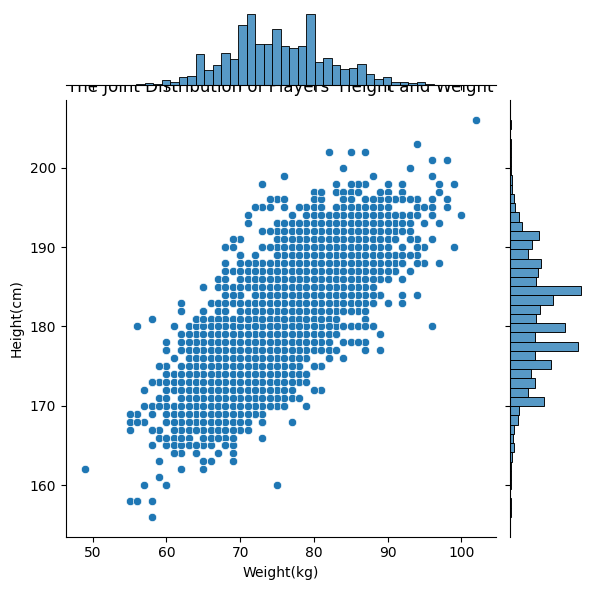

In [11]:
sns.jointplot(x='Weight',y='Height',data= Dataset1_encoded, kind='scatter')
plt.xlabel('Weight(kg)')
plt.ylabel('Height(cm)')
plt.title("The Joint Distribution of Players' Height and Weight")
plt.show()

In [5]:
# Feature extraction will be adding Body Mass Index based on Height and Weight and then dropping them as they will be unnecessary in our dataset. 
BMI = Dataset1_encoded['Weight']/((Dataset1_encoded['Height']/100) ** 2)
# BMI = pd.DataFrame(BMI, columns=['BMI'])
BMI = pd.Series(BMI, name='BMI')

In [8]:
dataset1_encoded_BMI = pd.concat([Dataset1_encoded, BMI],axis =1)
dataset1_encoded_BMI

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,...,Club_Śląsk Wrocław,Preferred Foot_Left,Preferred Foot_Right,Body Type_Lean,Body Type_Normal,Body Type_Stocky,Position_Back,Position_Forward,Position_Middle,BMI
0,27,86,87,78500000,190000,3,3,4,179,69,...,0,0,1,0,0,1,0,0,1,21.534908
1,30,85,85,46500000,46000,2,3,3,172,69,...,0,1,0,0,0,1,1,0,0,23.323418
2,31,91,91,107500000,350000,4,5,4,181,70,...,0,0,1,0,0,1,0,0,1,21.366869
3,25,86,89,89500000,110000,3,3,3,172,68,...,0,0,1,0,1,0,0,0,1,22.985398
4,27,89,90,105500000,130000,4,4,3,177,75,...,0,0,1,0,1,0,0,0,1,23.939481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,27,59,61,210000,2000,1,3,1,193,86,...,0,1,0,0,0,1,1,0,0,23.087868
4899,28,54,56,90000,500,1,2,1,177,75,...,0,0,1,1,0,0,1,0,0,23.939481
4900,31,60,60,130000,1000,1,3,1,192,80,...,0,0,1,0,1,0,1,0,0,21.701389
4901,20,58,69,375000,650,1,2,1,178,70,...,0,0,1,1,0,0,1,0,0,22.093170


### Question 1.3 - Transformations (18 pts)

Use `sns.jointplot` to investigate the following relationships and apply Logarithm transformation and replace the feature with its transformation **where needed** (Drop the variables that has been transformed and keep the logarithm transformation of that variable instead):

Note: plot joint distributions **before** and **after** trasformation (if it's needed) to make sure the transformation fixes the problem.

- Value vs. Wage
- Value vs. Overall
- Value vs. Potential


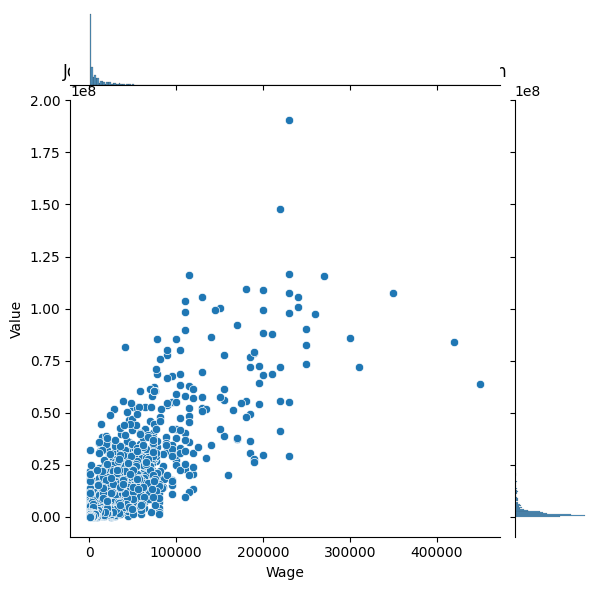

In [35]:
sns.jointplot(x='Wage',y='Value',data=Dataset1_encoded_BMI, kind='scatter')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title("Joint distribution Wage & Value before transformation")
plt.show()

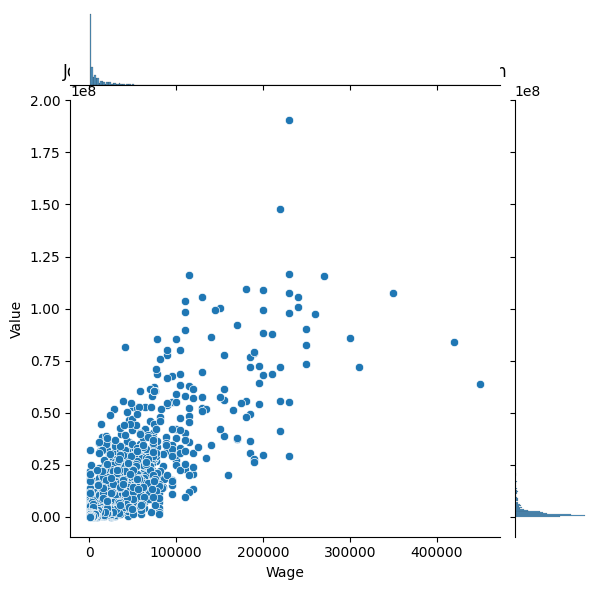

In [9]:
## apply log first and then see the relationship between "Value" & "Wage"
dataset1_encoded_BMI['Wage'] = np.log(Dataset1_encoded_BMI['Wage'])
sns.jointplot(x='Wage',y='Value',data=Dataset1_encoded_BMI, kind='scatter')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title("Joint distribution Wage & Value before transformation")
plt.show()


In [ ]:
sns.jointplot(x='Wage',y='Value',data=Dataset1_encoded_BMI, kind='scatter')

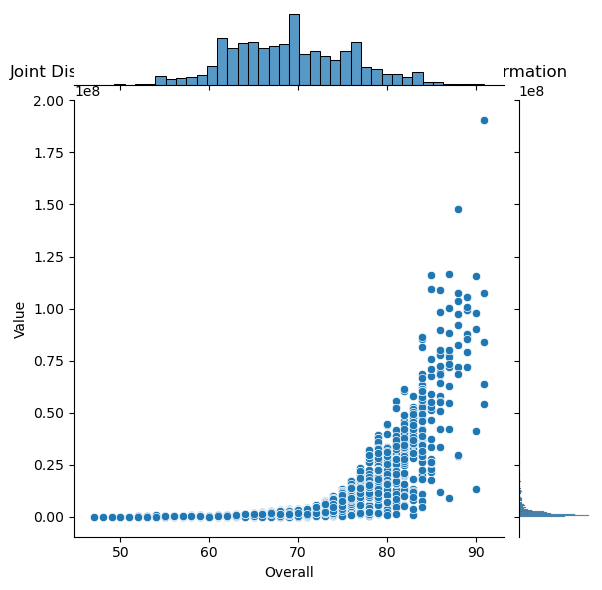

In [43]:
sns.jointplot(x='Overall',y='Value',data=Dataset1_encoded_BMI, kind='scatter')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Joint Distribution between Overall and Value before transformation')
plt.show()

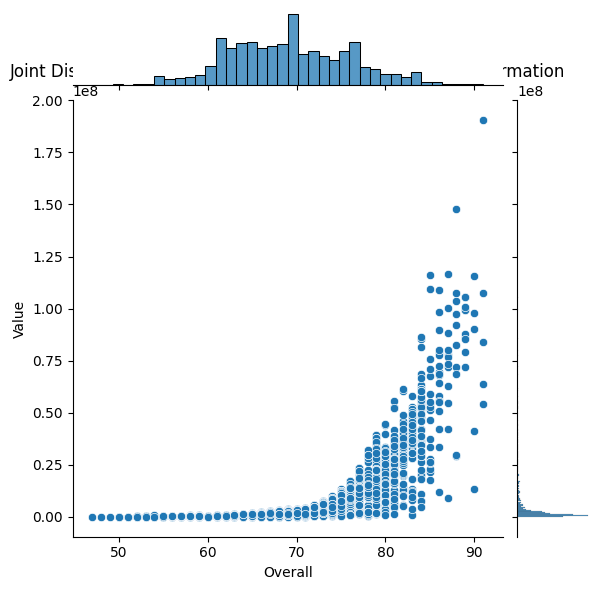

In [10]:
dataset1_encoded_BMI['Overall'] = np.log(Dataset1_encoded_BMI['Wage'])
sns.jointplot(x='Overall',y='Value',data=Dataset1_encoded_BMI, kind='scatter')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Joint Distribution between Overall and Value before transformation')
plt.show()

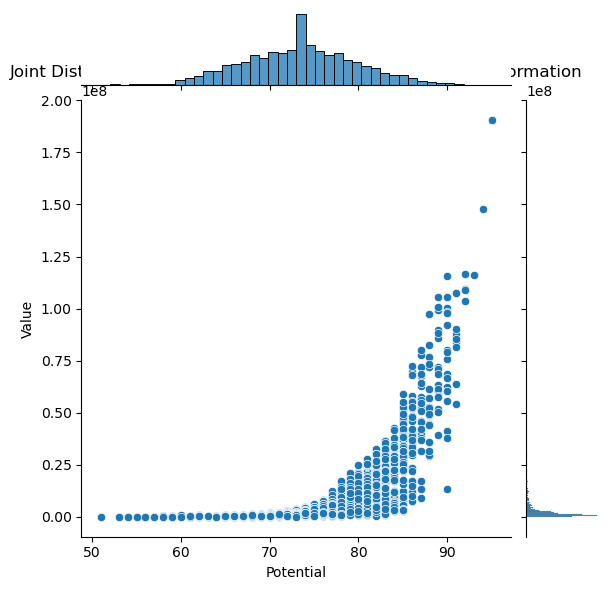

In [47]:
sns.jointplot(x='Potential',y='Value',data=Dataset1_encoded_BMI, kind='scatter')
plt.xlabel('Potential')
plt.ylabel('Value')
plt.title('Joint Distribution between potential and value before transformation')
plt.show()

### Question 1.4 - Data split (8 pts)

- Split data to put aside 20% for testing purpose (with `random_state=1220`).

  _Note: keep the Value (or LogValue if you transformed it in Question 1.3) as the target variable, and use the remaining variables as features._

- Also define an RMSE scorer function.


In [ ]:
# [write your code here]

### Question 1.5 - Linear Regression (10 pts)

- Implement shuffled 5-split Kfold cross-validation on the sklearn's linear regression (with default arguments) and RMSE scorer function above and report the mean of cross validation score.
- Fit the model to the training set.
- Report prediction RMSE score.


In [ ]:
# [write your code here]

### Question 1.6 - Dimensionality Reduction (14 pts)

- Implement dimensionality reduction on the dataset using PCA (Principal Component Analysis), then reapply linear regression following the approach outlined in the previous question.
- Choose the number of components such that a significant portion of the variance is retained (e.g., 95% of the variance).
- Ensure to standardize your data (mean of 0 and variance of 1) before applying PCA since PCA is sensitive to the variances of the initial variables.


In [12]:
dataset1_encoded_BMI.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,...,Club_Śląsk Wrocław,Preferred Foot_Left,Preferred Foot_Right,Body Type_Lean,Body Type_Normal,Body Type_Stocky,Position_Back,Position_Forward,Position_Middle,BMI
0,27,12.154779,87,78500000,12.154779,3,3,4,179,69,...,0,0,1,0,0,1,0,0,1,21.534908
1,30,10.736397,85,46500000,10.736397,2,3,3,172,69,...,0,1,0,0,0,1,1,0,0,23.323418
2,31,12.765688,91,107500000,12.765688,4,5,4,181,70,...,0,0,1,0,0,1,0,0,1,21.366869
3,25,11.608236,89,89500000,11.608236,3,3,3,172,68,...,0,0,1,0,1,0,0,0,1,22.985398
4,27,11.775290,90,105500000,11.775290,4,4,3,177,75,...,0,0,1,0,1,0,0,0,1,23.939481


In [13]:
dataset1_encoded_BMI.dtypes

Age                   int64
Overall             float64
Potential             int64
Value                 int64
Wage                float64
                     ...   
Body Type_Stocky      int64
Position_Back         int64
Position_Forward      int64
Position_Middle       int64
BMI                 float64
Length: 1003, dtype: object

In [22]:
X = dataset1_encoded_BMI.drop(columns=['Value'])
y = dataset1_encoded_BMI['Value']

X_scaler = copy.deepcopy(X)
y_scaler = copy.deepcopy(y)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_scaler)

pca = PCA(n_components=0.95)
x_scaled_pca = pca.fit_transform(x_scaled)


regressor = LinearRegression()
regressor.fit(x_scaled_pca , y_scaler)

LinearRegression()

In [16]:
###### useless
pca = PCA()
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

explained_variance_ratio, cumulative_variance

(array([5.08303662e-01, 2.68166297e-01, 1.18927583e-01, ...,
        1.34132951e-34, 3.34506296e-35, 2.23570194e-35]),
 array([0.50830366, 0.77646996, 0.89539754, ..., 1.        , 1.        ,
        1.        ]))

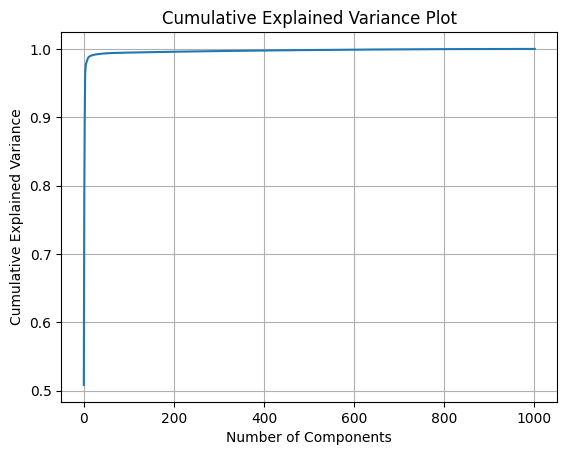

In [17]:
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

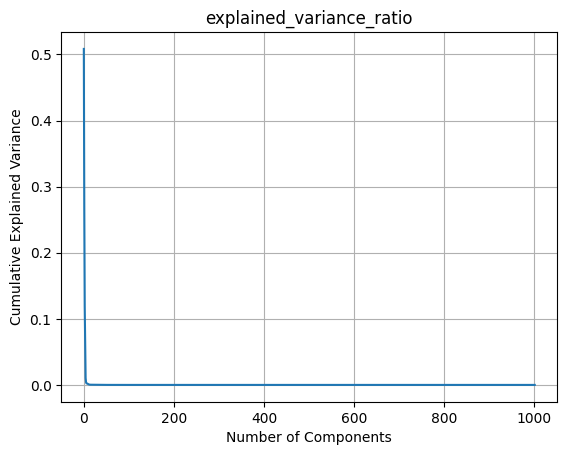

In [19]:
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('explained_variance_ratio')
plt.grid(True)
plt.show()

### Question 1.7 - Comparison (2 pts)

**Written question:** Based on the observed outcomes of questions 1.5 and 1.6, is there a distinction between their results? If so, what rationale can be provided for these differences?


**Your written answer here **


## Question 2: Clustering (30 pts)

### Dataset

In this question you need to download and use Dataset2.

This dataset is a modified dataset from UCI Machine Learning Datasets. The data contains selling feature on a social media platform. Each record has information about the time the information is posted and engagements in the data (such as emotion).


### Question 2.1 Data load and normalization (12 pts)

- Load the Dataset.

- How many observations and attributes do you have in Data set?

- Check for missing values and drop the columns that contain missing values, and ID column.

- Create a label encoder using "LabelEncoder" from scikit learn and convert categorical label (`data_type`) into integers.

- Then train a `MinMaxScaler` method over your full dataset. (**Note**: save a sample of `data_type` column before normalization for further use as the label later in Question 2.3).


In [26]:
# [write your code here]
dataset_2 = pd.read_csv('Dataset2.csv')
dataset_2

,ID,data_type,data_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [28]:
data = copy.deepcopy(dataset_2)

data = data.drop(['ID', 'data_published'], axis=1)
data


,data_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [31]:
label_encoder = LabelEncoder()
data['data_type'] = label_encoder.fit_transform(data['data_type'])
data_sample_data_type = data['data_type'] 

In [32]:
sacler = MinMaxScaler()
data_scaler = sacler.fit_transform(data)
data_scaler 

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 3.60934183e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

- **Written question:** Explain why it is a good idea to normalize the data for a K-Means clustering process.


**Your written answer here **


### Question 2.2 K-Means Clustering - Silhouette (10 pts)

- Use K-means to cluster data. Run a silhouette analysis over the data to answer these question. Create a silhouette plot for 2, 3, and 4 clusters and calculate the corresponding silhouette scores. Use a random seed of 20211231 for your cluster functions.


For n_clusters = 2 The average silhouette_score is : 0.7640959333166681
For n_clusters = 3 The average silhouette_score is : 0.7790520443508469
For n_clusters = 4 The average silhouette_score is : 0.7385843810497569


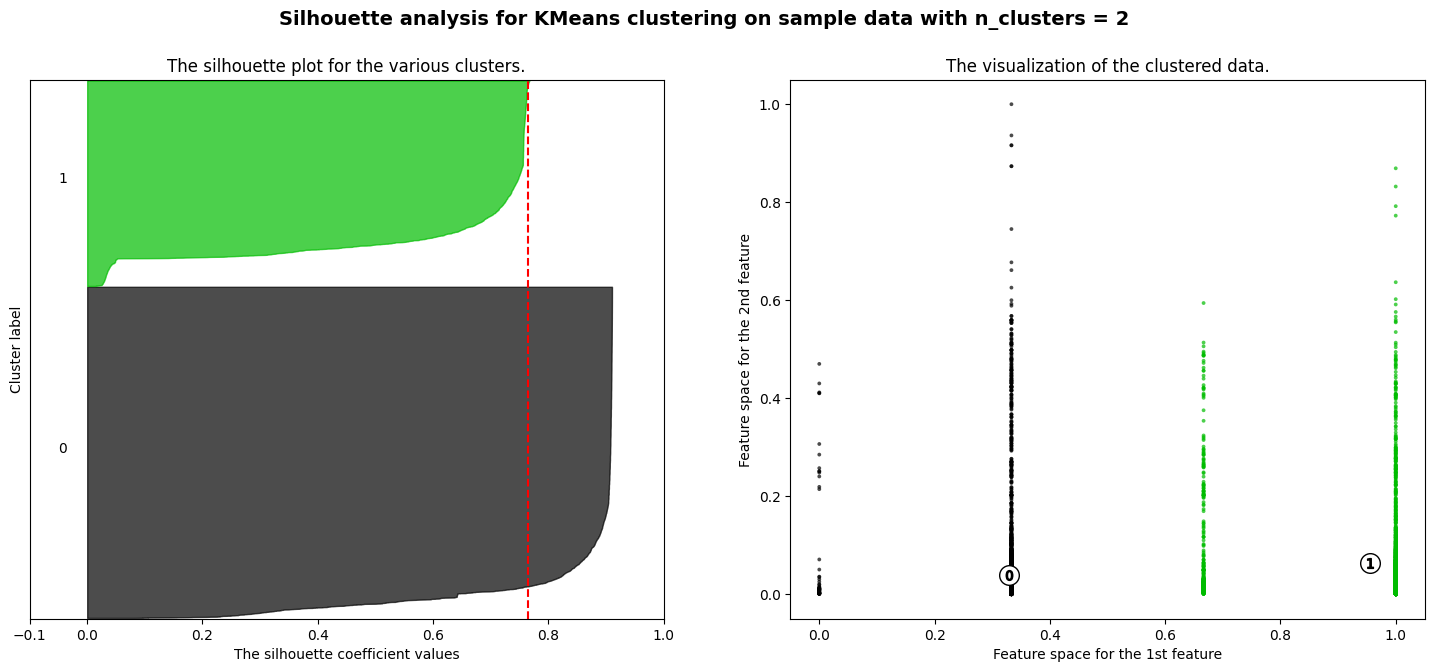

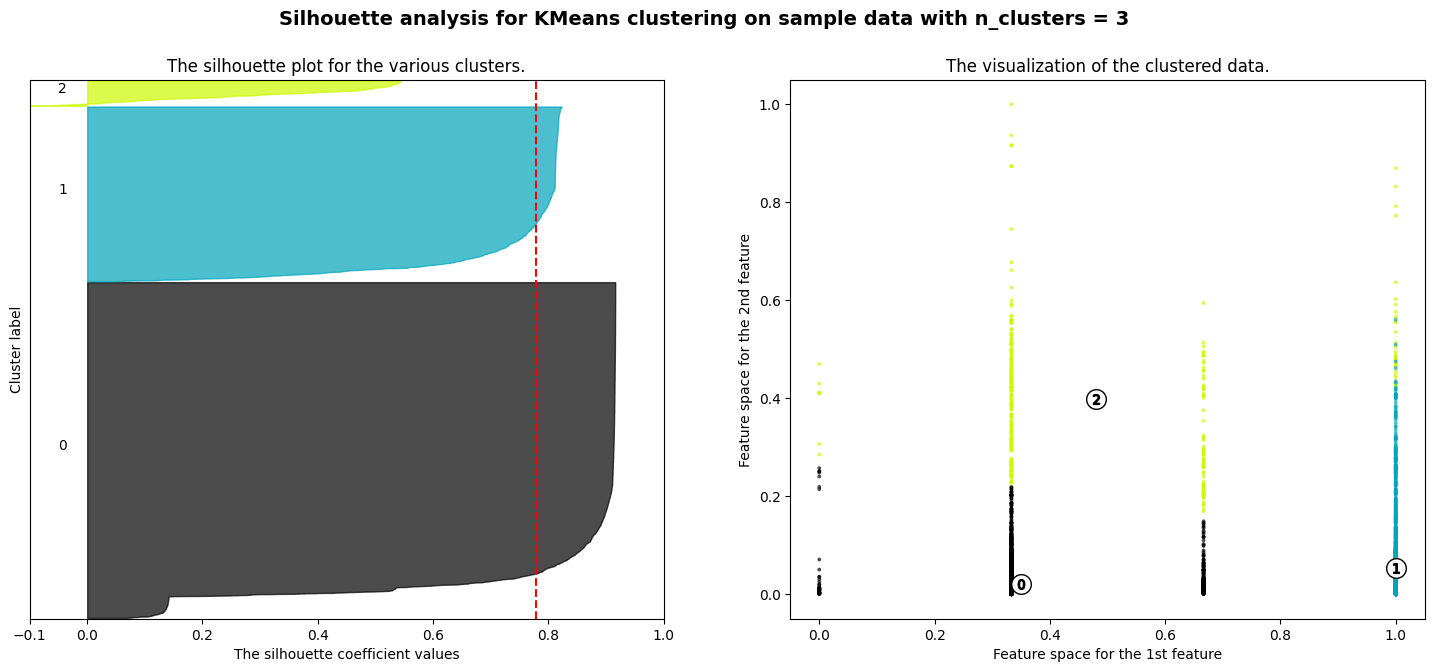

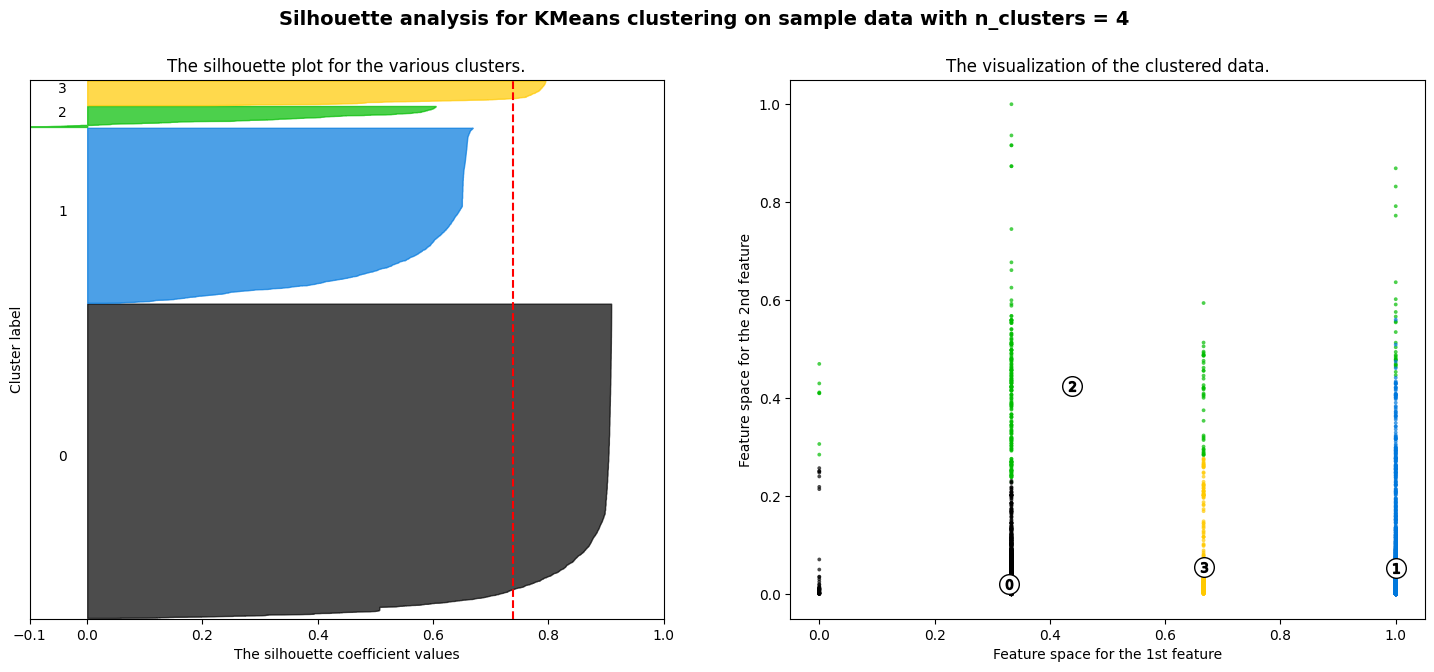

In [34]:
# [write your code here]
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4]

X = copy.deepcopy(data_scaler)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7640959333166681
For n_clusters = 3 The average silhouette_score is : 0.7790520443508469
For n_clusters = 4 The average silhouette_score is : 0.7385843810497569


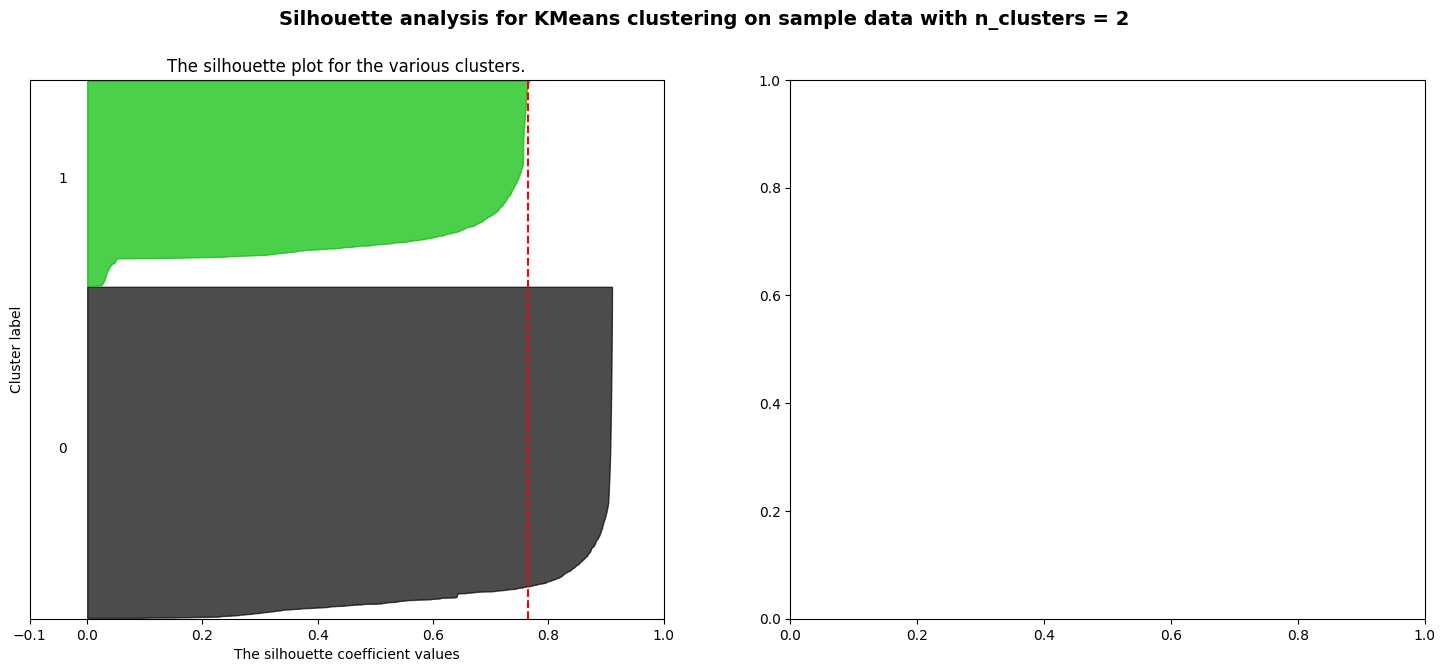

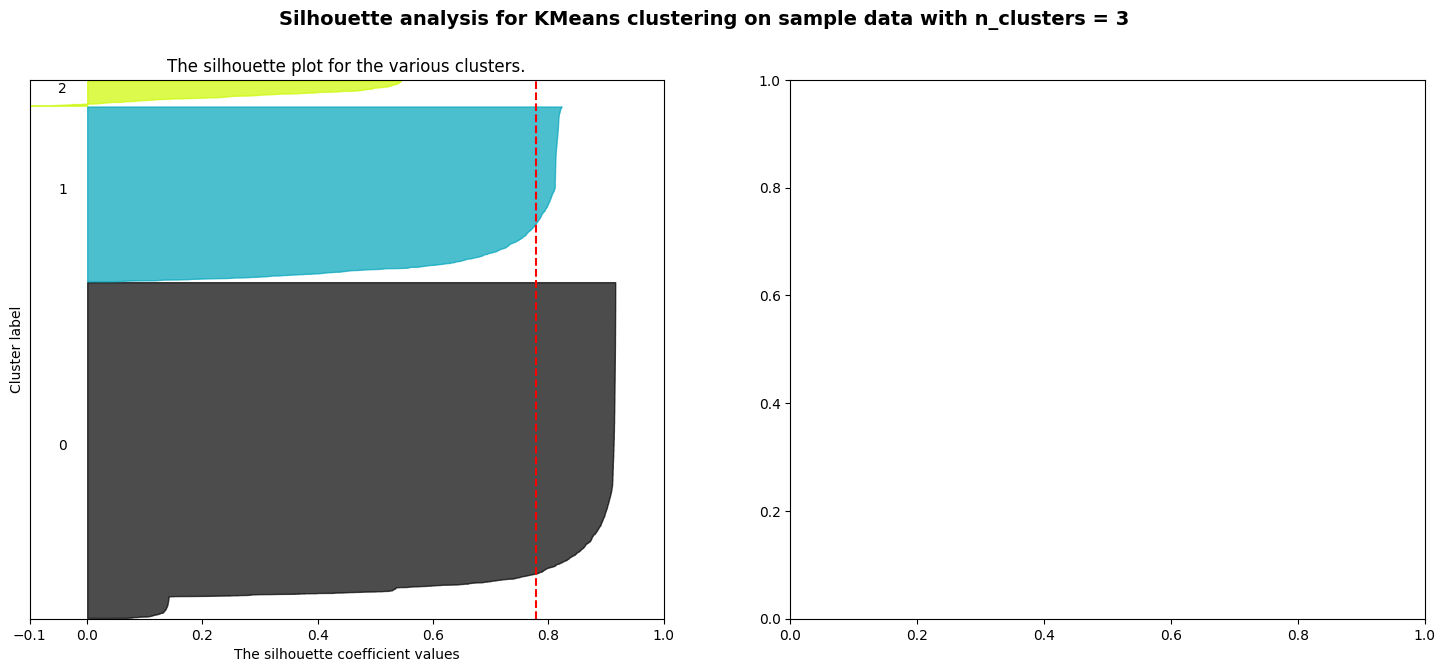

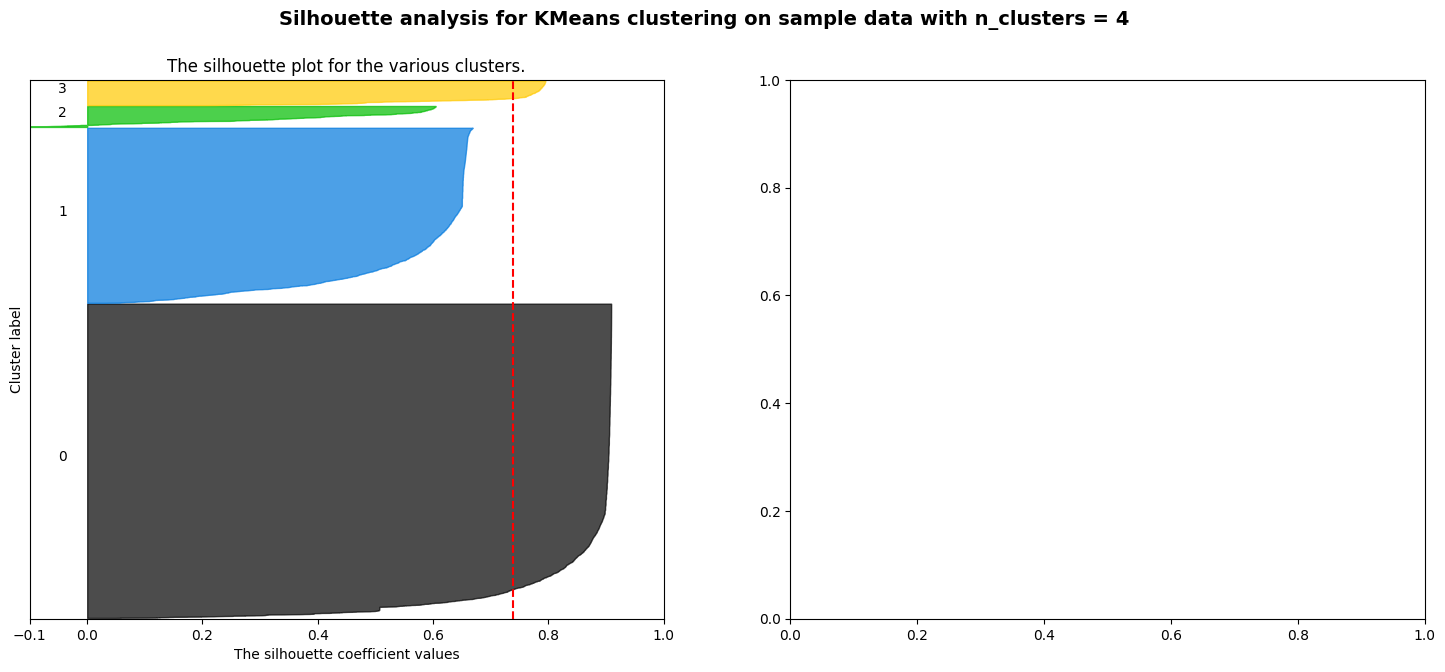

In [38]:
# [write your code here]
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4]

X = copy.deepcopy(data_scaler)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

- **Written question:** How many clusters would you say the silhouette analysis show are in the data? Why?\*\*


**Your written answer here **


### Question 2.3 K-Means Clustering - Elbow (8 pts)

- Use elbow method to find optimal number of clusters for up to 10 clusters.
- Compare the models accuracy for the best three number of clusters (Hint: use "kmeans.fit").


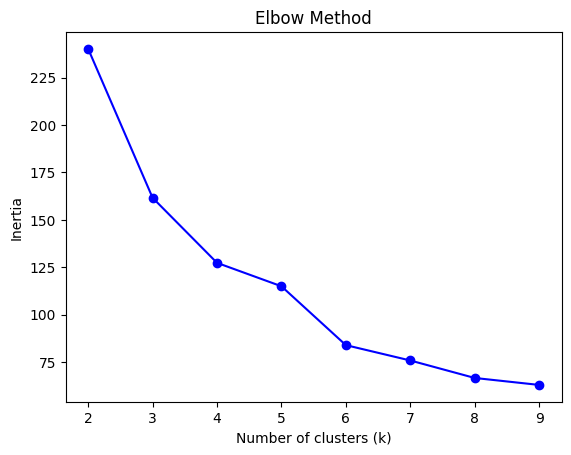

In [37]:
# [write your code here]
import matplotlib.pyplot as plt
 
# Create a range of values for k
k_range = range(2, 10)
 
# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []
 
# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1220)
    y_kmeans = kmeans.fit_predict(data_scaler)
    inertia_values.append(kmeans.inertia_)
   
 
# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

- **Written question:** Explain your final decision.


**Your written answer here **
